✅ Google Generative AI library available
✅ Gemini API configured successfully


2025-07-19 21:13:13.270 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.


✅ Successfully imported main.py

🔍 Available classes and functions in main.py:
  - Dict: <class 'typing._SpecialGenericAlias'>
  - GeminiCodeExplainer: <class 'type'>
    ✅ Has explain_code method
  - List: <class 'typing._SpecialGenericAlias'>
  - Optional: <class 'typing._SpecialForm'>
  - ThreadPoolExecutor: <class 'type'>
  - Tuple: <class 'typing._TupleType'>
  - load_dotenv: <class 'function'>
  - main: <class 'function'>

✅ Successfully initialized GeminiCodeExplainer from main.py
Creating test dataset...
Created 6 test cases

📋 Test Dataset Overview:
            category complexity                                                expected_concepts
0  linear_regression     simple               [pandas, sklearn, linear regression, fit, predict]
1     neural_network     medium   [tensorflow, neural network, dense layer, dropout, activation]
2      random_forest     medium      [random forest, train test split, classification, ensemble]
3       optimization    complex      [gradient 

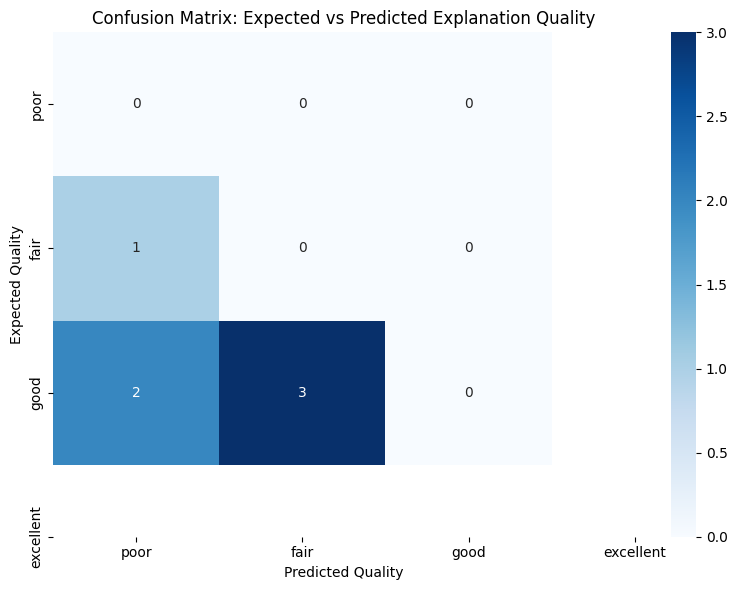

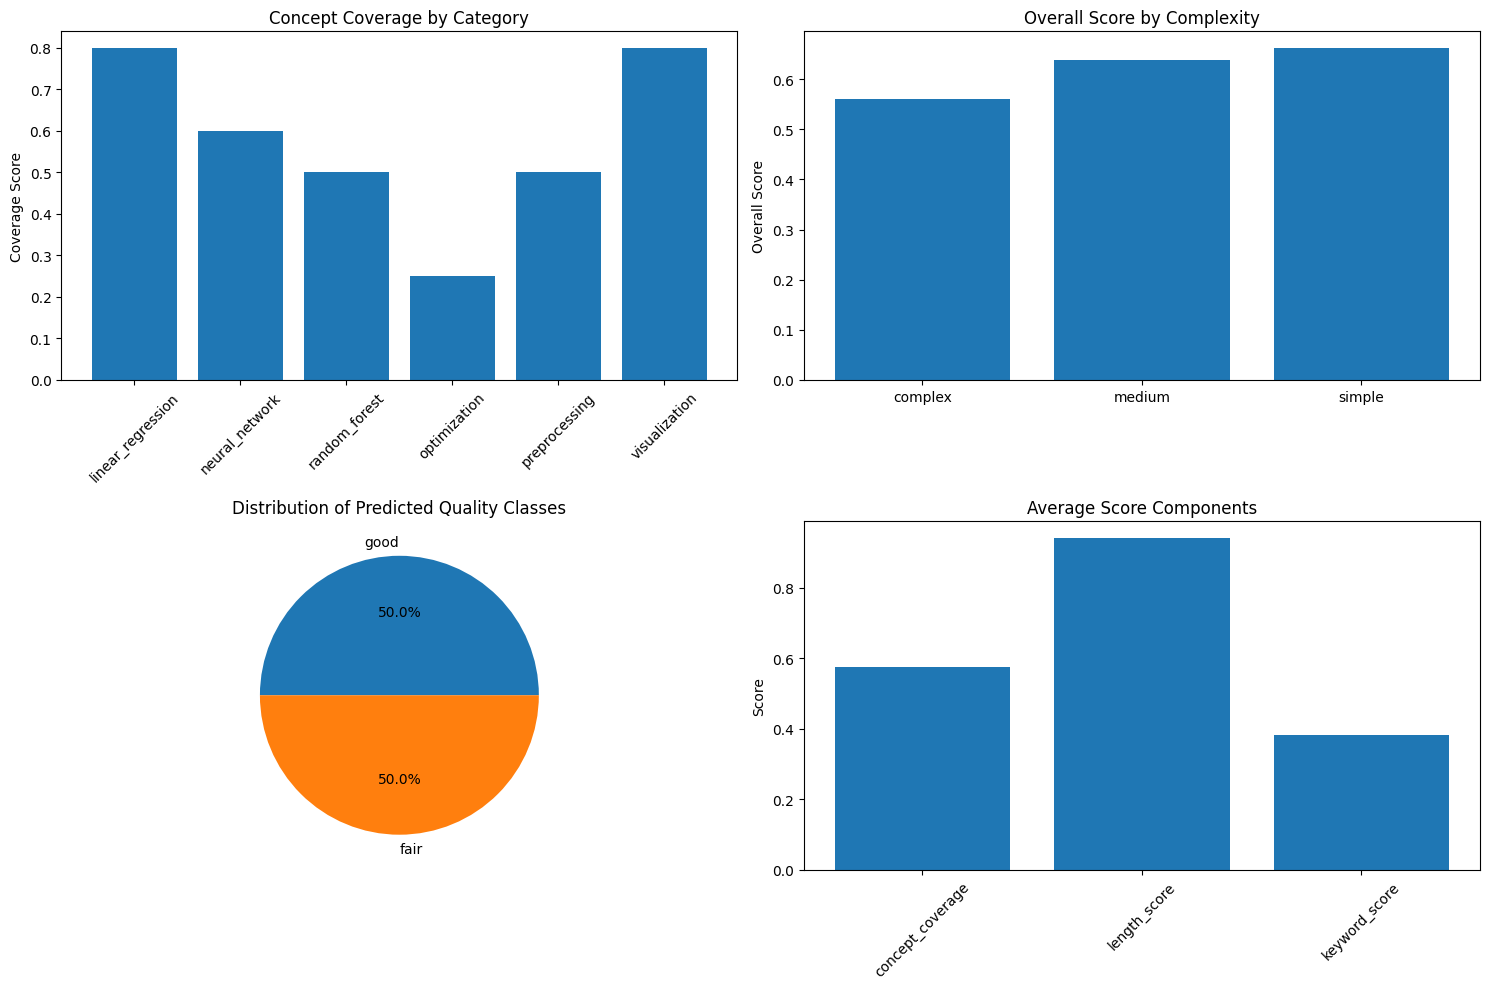


💾 Results saved to 'code_explainer_evaluation_results.csv'

INDIVIDUAL TESTING EXAMPLE
Sample code:

from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
    

📊 Quality score: 0.585
📊 Concept coverage: 0.667

📝 Explanation preview:
**Go Code Analysis:**

• **Module Import**: Imports external libraries/modules
• **Variable Assignment**: Creates/assigns variable `model`

🎯 Framework ready for testing your ML code explanations!


In [1]:
# ML Code Explainer Testing Framework with Gemini API Integration
# This notebook tests your code explanation system using various metrics

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.metrics import classification_report
import re
import ast
import sys
import importlib.util
import os
from typing import List, Dict, Tuple, Any
import warnings
warnings.filterwarnings('ignore')

# Import Gemini API
try:
    import google.generativeai as genai
    GEMINI_AVAILABLE = True
    print("✅ Google Generative AI library available")
except ImportError:
    GEMINI_AVAILABLE = False
    print("❌ Google Generative AI library not available. Install with: pip install google-generativeai")

# Configure Gemini API
def setup_gemini():
    """Setup Gemini API with environment variable"""
    api_key = os.getenv('GEMINI_API_KEY')
    if not api_key:
        print("❌ GEMINI_API_KEY environment variable not found")
        print("Please set it with: export GEMINI_API_KEY=your_api_key")
        return None
    
    try:
        genai.configure(api_key=api_key)
        model = genai.GenerativeModel('gemini-pro')
        print("✅ Gemini API configured successfully")
        return model
    except Exception as e:
        print(f"❌ Failed to configure Gemini API: {e}")
        return None

# Initialize Gemini model
gemini_model = None
if GEMINI_AVAILABLE:
    gemini_model = setup_gemini()

class GeminiCodeExplainer:
    """
    Code explainer using Gemini API
    """
    
    def __init__(self, model=None):
        self.model = model or gemini_model
        
    def explain_code(self, code: str, add_comments: bool = True) -> Dict[str, Any]:
        """
        Explain code using Gemini API
        
        Args:
            code: The code to explain
            add_comments: Whether to add inline comments
            
        Returns:
            Dictionary with explanation components
        """
        if not self.model:
            return {
                "error": "Gemini model not available",
                "overall_explanation": "Gemini API not configured",
                "block_explanations": [],
                "commented_code": code,
                "model_used": "none"
            }
        
        try:
            # Create prompt for overall explanation
            overall_prompt = f"""
            Analyze this machine learning code and provide a clear, comprehensive explanation.
            Focus on:
            1. What libraries and algorithms are being used
            2. What the code accomplishes
            3. Key ML concepts involved
            4. Data flow and transformations
            
            Code:
            ```python
            {code}
            ```
            
            Provide a detailed explanation in 2-3 paragraphs:
            """
            
            # Get overall explanation
            overall_response = self.model.generate_content(overall_prompt)
            overall_explanation = overall_response.text.strip()
            
            # Create prompt for block-by-block explanation
            block_prompt = f"""
            Analyze this code line by line or block by block. For each significant block, explain:
            - What it does
            - Why it's important
            - Any ML concepts involved
            
            Code:
            ```python
            {code}
            ```
            
            Provide explanations for each significant block:
            """
            
            block_response = self.model.generate_content(block_prompt)
            block_explanations = block_response.text.strip()
            
            # Create commented code if requested
            commented_code = code
            if add_comments:
                comment_prompt = f"""
                Add inline comments to this code explaining what each line or block does.
                Focus on ML concepts, data transformations, and algorithm steps.
                Return only the commented code.
                
                Code:
                ```python
                {code}
                ```
                """
                
                comment_response = self.model.generate_content(comment_prompt)
                commented_code = comment_response.text.strip()
                
                # Clean up the response (remove markdown if present)
                if commented_code.startswith('```python'):
                    commented_code = commented_code.replace('```python', '').replace('```', '').strip()
            
            return {
                "overall_explanation": overall_explanation,
                "block_explanations": block_explanations,
                "commented_code": commented_code,
                "model_used": "gemini-pro"
            }
            
        except Exception as e:
            return {
                "error": str(e),
                "overall_explanation": f"Error explaining code: {str(e)}",
                "block_explanations": [],
                "commented_code": code,
                "model_used": "gemini-pro-error"
            }

# Try to import main.py first, fallback to Gemini
sys.path.append('.')
code_explainer = None

try:
    import main
    print("✅ Successfully imported main.py")
    
    # Debug: Show all available classes and functions
    print("\n🔍 Available classes and functions in main.py:")
    for attr_name in dir(main):
        if not attr_name.startswith('_'):
            attr = getattr(main, attr_name)
            if callable(attr):
                print(f"  - {attr_name}: {type(attr)}")
                if hasattr(attr, 'explain_code'):
                    print(f"    ✅ Has explain_code method")
    
    # Try to find and initialize the class from main.py
    for attr_name in dir(main):
        attr = getattr(main, attr_name)
        if (hasattr(attr, '__init__') and hasattr(attr, 'explain_code') and 
            callable(attr) and attr_name != 'object'):
            try:
                code_explainer = attr()
                print(f"\n✅ Successfully initialized {attr_name} from main.py")
                break
            except Exception as e:
                print(f"❌ Failed to initialize {attr_name}: {e}")
                
except ImportError as e:
    print(f"⚠️  Could not import main.py: {e}")
    print("Falling back to Gemini API...")

# If main.py failed, use Gemini
if code_explainer is None:
    if gemini_model:
        code_explainer = GeminiCodeExplainer(gemini_model)
        print("✅ Using Gemini API for code explanation")
    else:
        print("❌ No code explainer available (neither main.py nor Gemini)")

class CodeExplainerEvaluator:
    """
    A comprehensive evaluation framework for ML code explainers
    """
    
    def __init__(self, explainer_instance=None):
        """
        Initialize the evaluator
        
        Args:
            explainer_instance: The instance of your code explainer class
        """
        self.explainer_instance = explainer_instance
        self.test_results = []
        self.metrics = {}
        
    def create_test_dataset(self) -> pd.DataFrame:
        """
        Creates a comprehensive test dataset with various code examples
        """
        test_data = [
            {
                'code': '''
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression

data = pd.read_csv('data.csv')
X = data[['feature1', 'feature2']]
y = data['target']

model = LinearRegression()
model.fit(X, y)
predictions = model.predict(X)
                ''',
                'category': 'linear_regression',
                'complexity': 'simple',
                'expected_concepts': ['pandas', 'sklearn', 'linear regression', 'fit', 'predict'],
                'quality_score': 5
            },
            {
                'code': '''
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

model = Sequential([
    Dense(128, activation='relu', input_shape=(10,)),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dense(1, activation='sigmoid')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
                ''',
                'category': 'neural_network',
                'complexity': 'medium',
                'expected_concepts': ['tensorflow', 'neural network', 'dense layer', 'dropout', 'activation'],
                'quality_score': 4
            },
            {
                'code': '''
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

y_pred = rf.predict(X_test)
print(classification_report(y_test, y_pred))
                ''',
                'category': 'random_forest',
                'complexity': 'medium',
                'expected_concepts': ['random forest', 'train test split', 'classification', 'ensemble'],
                'quality_score': 5
            },
            {
                'code': '''
import numpy as np

def gradient_descent(X, y, learning_rate=0.01, iterations=1000):
    m, n = X.shape
    theta = np.zeros(n)
    
    for i in range(iterations):
        predictions = X.dot(theta)
        errors = predictions - y
        gradient = X.T.dot(errors) / m
        theta -= learning_rate * gradient
    
    return theta
                ''',
                'category': 'optimization',
                'complexity': 'complex',
                'expected_concepts': ['gradient descent', 'optimization', 'learning rate', 'iterations'],
                'quality_score': 4
            },
            {
                'code': '''
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X_scaled)
                ''',
                'category': 'preprocessing',
                'complexity': 'medium',
                'expected_concepts': ['standardization', 'PCA', 'dimensionality reduction', 'preprocessing'],
                'quality_score': 4
            },
            {
                'code': '''
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Feature Correlation Matrix')
plt.show()
                ''',
                'category': 'visualization',
                'complexity': 'simple',
                'expected_concepts': ['matplotlib', 'seaborn', 'heatmap', 'correlation', 'visualization'],
                'quality_score': 3
            }
        ]
        
        return pd.DataFrame(test_data)
    
    def evaluate_explanation_quality(self, explanation_result: dict, expected_concepts: List[str]) -> Dict[str, float]:
        """
        Evaluate the quality of an explanation based on concept coverage
        """
        # Handle the dictionary result from explain_code method
        if isinstance(explanation_result, dict):
            # Combine all explanation text
            explanation_text = ""
            if 'overall_explanation' in explanation_result:
                explanation_text += explanation_result['overall_explanation'] + " "
            if 'block_explanations' in explanation_result:
                if isinstance(explanation_result['block_explanations'], list):
                    explanation_text += " ".join(explanation_result['block_explanations']) + " "
                else:
                    explanation_text += str(explanation_result['block_explanations']) + " "
            if 'commented_code' in explanation_result:
                explanation_text += explanation_result['commented_code'] + " "
            explanation = explanation_text
        else:
            explanation = str(explanation_result)
            
        explanation_lower = explanation.lower()
        
        # Check concept coverage
        concepts_found = sum(1 for concept in expected_concepts 
                           if concept.lower() in explanation_lower)
        concept_coverage = concepts_found / len(expected_concepts) if expected_concepts else 0
        
        # Check explanation length (reasonable explanations should be substantial)
        length_score = min(len(explanation.split()) / 50, 1.0)  # Normalize to 50 words as good length
        
        # Check for code-related keywords
        code_keywords = ['function', 'variable', 'import', 'data', 'model', 'algorithm', 'parameter']
        keywords_found = sum(1 for keyword in code_keywords 
                           if keyword in explanation_lower)
        keyword_score = min(keywords_found / len(code_keywords), 1.0)
        
        return {
            'concept_coverage': concept_coverage,
            'length_score': length_score,
            'keyword_score': keyword_score,
            'overall_score': (concept_coverage + length_score + keyword_score) / 3
        }
    
    def classify_explanation_quality(self, overall_score: float) -> str:
        """
        Classify explanation quality into categories
        """
        if overall_score >= 0.8:
            return 'excellent'
        elif overall_score >= 0.6:
            return 'good'
        elif overall_score >= 0.4:
            return 'fair'
        else:
            return 'poor'
    
    def run_evaluation(self, test_df: pd.DataFrame) -> pd.DataFrame:
        """
        Run the complete evaluation on the test dataset
        """
        results = []
        
        for idx, row in test_df.iterrows():
            print(f"\n🧪 Testing code {idx} ({row['category']})...")
            try:
                # Get explanation from your code explainer instance
                if self.explainer_instance and hasattr(self.explainer_instance, 'explain_code'):
                    explanation_result = self.explainer_instance.explain_code(row['code'], add_comments=True)
                    
                    if isinstance(explanation_result, dict):
                        # Format the explanation for display
                        explanation_text = ""
                        if 'overall_explanation' in explanation_result:
                            explanation_text += f"Overall Explanation: {explanation_result['overall_explanation']}\n\n"
                        if 'block_explanations' in explanation_result:
                            explanation_text += f"Block Explanations: {explanation_result['block_explanations']}\n\n"
                        if 'commented_code' in explanation_result:
                            explanation_text += f"Commented Code:\n{explanation_result['commented_code']}\n"
                        if 'model_used' in explanation_result:
                            explanation_text += f"Model Used: {explanation_result['model_used']}"
                    else:
                        explanation_text = str(explanation_result)
                else:
                    explanation_result = {"error": "No explainer instance available"}
                    explanation_text = "No explainer instance available"
                
                # Evaluate explanation quality
                quality_metrics = self.evaluate_explanation_quality(
                    explanation_result, row['expected_concepts']
                )
                
                # Classify quality
                quality_class = self.classify_explanation_quality(
                    quality_metrics['overall_score']
                )
                
                result = {
                    'code_id': idx,
                    'category': row['category'],
                    'complexity': row['complexity'],
                    'explanation': explanation_text,
                    'quality_class': quality_class,
                    'expected_quality': self.classify_explanation_quality(row['quality_score'] / 5),
                    **quality_metrics
                }
                
                results.append(result)
                
            except Exception as e:
                print(f"Error processing code {idx}: {e}")
                results.append({
                    'code_id': idx,
                    'category': row['category'],
                    'complexity': row['complexity'],
                    'explanation': f"Error: {str(e)}",
                    'quality_class': 'poor',
                    'expected_quality': 'good',
                    'concept_coverage': 0,
                    'length_score': 0,
                    'keyword_score': 0,
                    'overall_score': 0
                })
        
        return pd.DataFrame(results)
    
    def calculate_metrics(self, results_df: pd.DataFrame) -> Dict[str, float]:
        """
        Calculate evaluation metrics
        """
        # For classification metrics, we'll compare predicted vs expected quality
        y_true = results_df['expected_quality'].values
        y_pred = results_df['quality_class'].values
        
        # Create label mapping
        quality_labels = ['poor', 'fair', 'good', 'excellent']
        y_true_encoded = [quality_labels.index(label) for label in y_true]
        y_pred_encoded = [quality_labels.index(label) for label in y_pred]
        
        metrics = {
            'accuracy': accuracy_score(y_true_encoded, y_pred_encoded),
            'precision_macro': precision_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'recall_macro': recall_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'f1_macro': f1_score(y_true_encoded, y_pred_encoded, average='macro', zero_division=0),
            'avg_concept_coverage': results_df['concept_coverage'].mean(),
            'avg_length_score': results_df['length_score'].mean(),
            'avg_keyword_score': results_df['keyword_score'].mean(),
            'avg_overall_score': results_df['overall_score'].mean()
        }
        
        return metrics
    
    def plot_confusion_matrix(self, results_df: pd.DataFrame):
        """
        Plot confusion matrix for quality classification
        """
        y_true = results_df['expected_quality'].values
        y_pred = results_df['quality_class'].values
        
        quality_labels = ['poor', 'fair', 'good', 'excellent']
        y_true_encoded = [quality_labels.index(label) for label in y_true]
        y_pred_encoded = [quality_labels.index(label) for label in y_pred]
        
        cm = confusion_matrix(y_true_encoded, y_pred_encoded)
        
        plt.figure(figsize=(8, 6))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
                   xticklabels=quality_labels, yticklabels=quality_labels)
        plt.title('Confusion Matrix: Expected vs Predicted Explanation Quality')
        plt.xlabel('Predicted Quality')
        plt.ylabel('Expected Quality')
        plt.tight_layout()
        plt.show()
    
    def plot_metrics_by_category(self, results_df: pd.DataFrame):
        """
        Plot metrics by code category
        """
        fig, axes = plt.subplots(2, 2, figsize=(15, 10))
        
        # Concept Coverage by Category
        axes[0, 0].bar(results_df['category'], results_df['concept_coverage'])
        axes[0, 0].set_title('Concept Coverage by Category')
        axes[0, 0].set_ylabel('Coverage Score')
        axes[0, 0].tick_params(axis='x', rotation=45)
        
        # Overall Score by Complexity
        complexity_scores = results_df.groupby('complexity')['overall_score'].mean()
        axes[0, 1].bar(complexity_scores.index, complexity_scores.values)
        axes[0, 1].set_title('Overall Score by Complexity')
        axes[0, 1].set_ylabel('Overall Score')
        
        # Distribution of Quality Classes
        quality_counts = results_df['quality_class'].value_counts()
        axes[1, 0].pie(quality_counts.values, labels=quality_counts.index, autopct='%1.1f%%')
        axes[1, 0].set_title('Distribution of Predicted Quality Classes')
        
        # Score Components
        score_components = results_df[['concept_coverage', 'length_score', 'keyword_score']].mean()
        axes[1, 1].bar(score_components.index, score_components.values)
        axes[1, 1].set_title('Average Score Components')
        axes[1, 1].set_ylabel('Score')
        axes[1, 1].tick_params(axis='x', rotation=45)
        
        plt.tight_layout()
        plt.show()
    
    def generate_report(self, results_df: pd.DataFrame, metrics: Dict[str, float]):
        """
        Generate a comprehensive evaluation report
        """
        print("=" * 60)
        print("ML CODE EXPLAINER EVALUATION REPORT")
        print("=" * 60)
        
        print(f"\n📊 OVERALL METRICS:")
        print(f"Accuracy: {metrics['accuracy']:.3f}")
        print(f"F1-Score (Macro): {metrics['f1_macro']:.3f}")
        print(f"Precision (Macro): {metrics['precision_macro']:.3f}")
        print(f"Recall (Macro): {metrics['recall_macro']:.3f}")
        
        print(f"\n📈 QUALITY METRICS:")
        print(f"Average Concept Coverage: {metrics['avg_concept_coverage']:.3f}")
        print(f"Average Length Score: {metrics['avg_length_score']:.3f}")
        print(f"Average Keyword Score: {metrics['avg_keyword_score']:.3f}")
        print(f"Average Overall Score: {metrics['avg_overall_score']:.3f}")
        
        print(f"\n📋 CATEGORY BREAKDOWN:")
        category_performance = results_df.groupby('category')['overall_score'].agg(['mean', 'count'])
        for category, row in category_performance.iterrows():
            print(f"{category}: {row['mean']:.3f} (n={row['count']})")
        
        print(f"\n🎯 COMPLEXITY ANALYSIS:")
        complexity_performance = results_df.groupby('complexity')['overall_score'].mean()
        for complexity, score in complexity_performance.items():
            print(f"{complexity}: {score:.3f}")
        
        print(f"\n⚠️  PROBLEMATIC CASES:")
        poor_cases = results_df[results_df['quality_class'] == 'poor']
        if not poor_cases.empty:
            for idx, case in poor_cases.iterrows():
                print(f"Code {case['code_id']} ({case['category']}): Score = {case['overall_score']:.3f}")
        else:
            print("No poor quality explanations found! 🎉")

# Initialize the evaluator
evaluator = CodeExplainerEvaluator(code_explainer)

# Create test dataset
print("Creating test dataset...")
test_df = evaluator.create_test_dataset()
print(f"Created {len(test_df)} test cases")

# Display test cases
print("\n📋 Test Dataset Overview:")
print(test_df[['category', 'complexity', 'expected_concepts']].to_string())

# Run evaluation
print("\n🚀 Running evaluation...")
if code_explainer:
    try:
        results_df = evaluator.run_evaluation(test_df)
        
        # Calculate metrics
        metrics = evaluator.calculate_metrics(results_df)
        
        # Generate report
        evaluator.generate_report(results_df, metrics)
        
        # Plot visualizations
        print("\n📊 Generating visualizations...")
        evaluator.plot_confusion_matrix(results_df)
        evaluator.plot_metrics_by_category(results_df)
        
        # Save results
        results_df.to_csv('code_explainer_evaluation_results.csv', index=False)
        print("\n💾 Results saved to 'code_explainer_evaluation_results.csv'")
        
    except Exception as e:
        print(f"❌ Evaluation failed: {e}")
else:
    print("❌ No code explainer available")
    print("\nTo use this framework:")
    print("1. Set GEMINI_API_KEY environment variable")
    print("2. Install google-generativeai: pip install google-generativeai")
    print("3. Or ensure main.py has a code explainer class with explain_code method")

# Example individual testing
print("\n" + "="*50)
print("INDIVIDUAL TESTING EXAMPLE")
print("="*50)

if code_explainer:
    sample_code = '''
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)
    '''
    
    print(f"Sample code:\n{sample_code}")
    try:
        explanation = code_explainer.explain_code(sample_code)
        quality = evaluator.evaluate_explanation_quality(
            explanation, 
            ['logistic regression', 'sklearn', 'fit']
        )
        print(f"\n📊 Quality score: {quality['overall_score']:.3f}")
        print(f"📊 Concept coverage: {quality['concept_coverage']:.3f}")
        
        if isinstance(explanation, dict) and 'overall_explanation' in explanation:
            print(f"\n📝 Explanation preview:")
            print(explanation['overall_explanation'][:200] + "..." if len(explanation['overall_explanation']) > 200 else explanation['overall_explanation'])
    except Exception as e:
        print(f"Error in individual testing: {e}")

print("\n🎯 Framework ready for testing your ML code explanations!")